In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# might be needed depending on your version of Jupyter
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.[3] It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

Our Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model thatcan predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. Keep in mind classification metrics when evaluating the performance of your model!

**The "loan_status" column contains our label. **

In [2]:
df = pd.read_csv('/content/Lending_Club_Data_1.csv')
df.head()

,Unnamed: 0,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [3]:
df_info = pd.read_csv('/content/Lending_Club_Data.csv')
df_info

,LoanStatNew,Description
0,loan_amnt,The listed amount of the loan applied for by t...
1,term,The number of payments on the loan. Values are...
2,int_rate,Interest Rate on the loan
3,installment,The monthly payment owed by the borrower if th...
4,grade,LC assigned loan grade
5,sub_grade,LC assigned loan subgrade
6,emp_title,The job title supplied by the Borrower when ap...
7,emp_length,Employment length in years. Possible values ar...
8,home_ownership,The home ownership status provided by the borr...
9,annual_inc,The self-reported annual income provided by th...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            396030 non-null  int64  
 1   loan_amnt             396030 non-null  float64
 2   term                  396030 non-null  object 
 3   int_rate              396030 non-null  float64
 4   installment           396030 non-null  float64
 5   grade                 396030 non-null  object 
 6   sub_grade             396030 non-null  object 
 7   emp_title             373103 non-null  object 
 8   emp_length            377729 non-null  object 
 9   home_ownership        396030 non-null  object 
 10  annual_inc            396030 non-null  float64
 11  verification_status   396030 non-null  object 
 12  issue_d               396030 non-null  object 
 13  loan_status           396030 non-null  object 
 14  purpose               396030 non-null  object 
 15  

In [5]:
df.describe()

,Unnamed: 0,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.00000,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,198014.50000,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,114324.15789,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,0.00000,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,99007.25000,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,198014.50000,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,297021.75000,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,396029.00000,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [6]:
df.isna().sum()

Unnamed: 0                  0
loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

**Exploratory Data Analysis**

First lets check the label and its distribution.

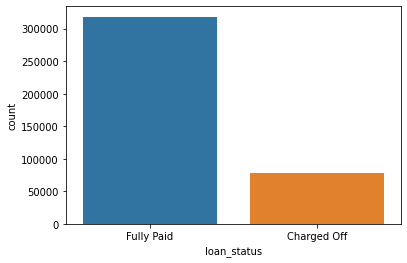

In [7]:
sns.countplot(x = 'loan_status', data = df)

We have a huge class imbalance here. Charged off are the ones who did not pay back the loan. 

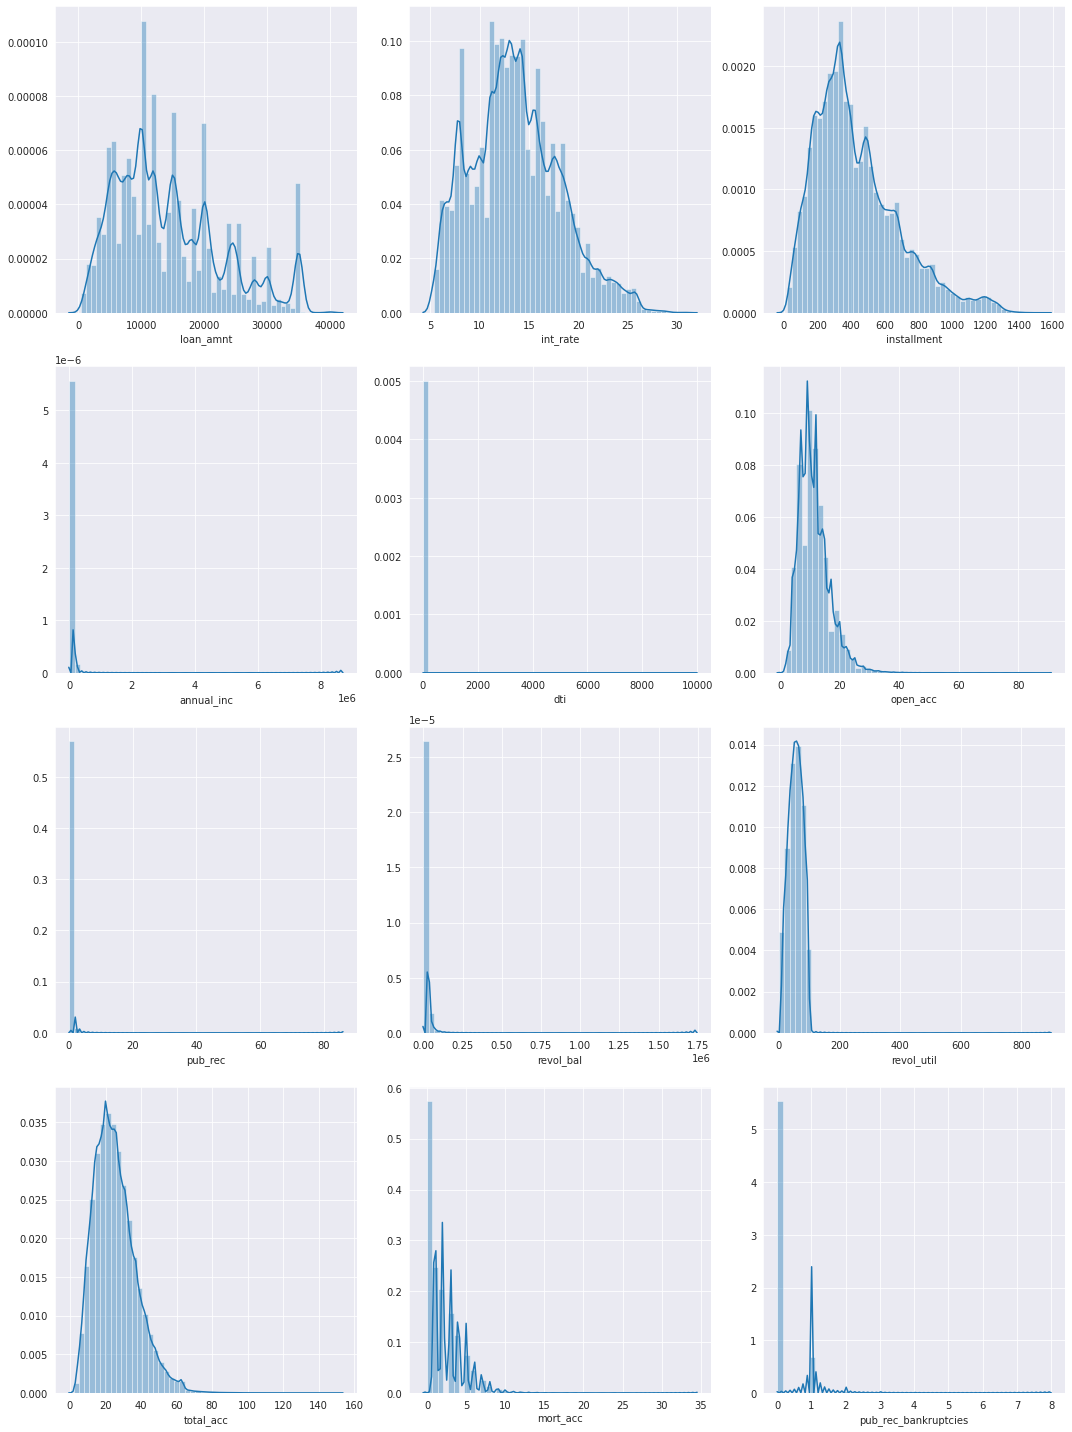

In [8]:
sns.set_style('darkgrid')
cols = ['loan_amnt',	'int_rate',	'installment',	'annual_inc',	'dti',	'open_acc',	'pub_rec', 'revol_bal',	'revol_util',	'total_acc',	'mort_acc',	'pub_rec_bankruptcies']
n_rows = 4
n_cols = 3

fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*5))

for r in range(0, n_rows):
    for c in range(0,n_cols):
        i = r*n_cols +c  
        ax = axs[r][c] 
        
        sns.distplot(df[cols[i]], ax = ax)
        
    plt.tight_layout()

In [9]:
df.head()

,Unnamed: 0,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


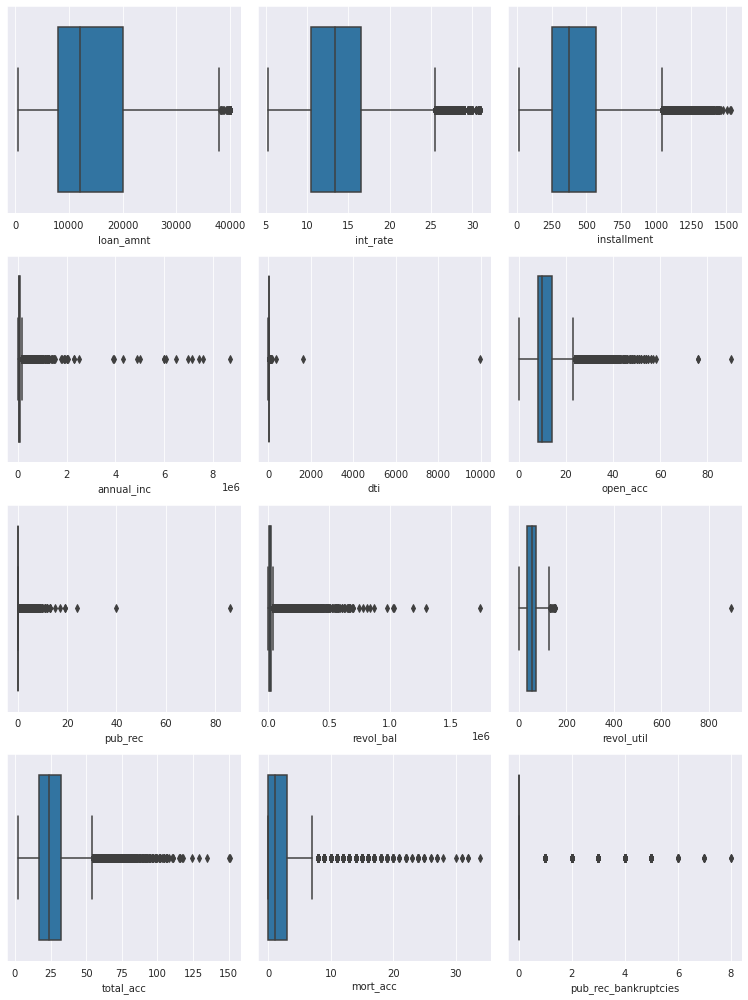

In [10]:
sns.set_style('darkgrid')
cols = ['loan_amnt', 'int_rate', 'installment',
        'annual_inc',
       'dti', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies']
n_rows = 4
n_cols = 3

fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*3.5, n_rows*3.5))

for r in range(0, n_rows):
    for c in range(0,n_cols):
        i = r*n_cols +c  
        ax = axs[r][c] 
        
        sns.boxplot(df[cols[i]], ax = ax)
        
    plt.tight_layout()

In [11]:
df = df.drop('Unnamed: 0', axis = 1)

In [12]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


(10.0, 0.0)

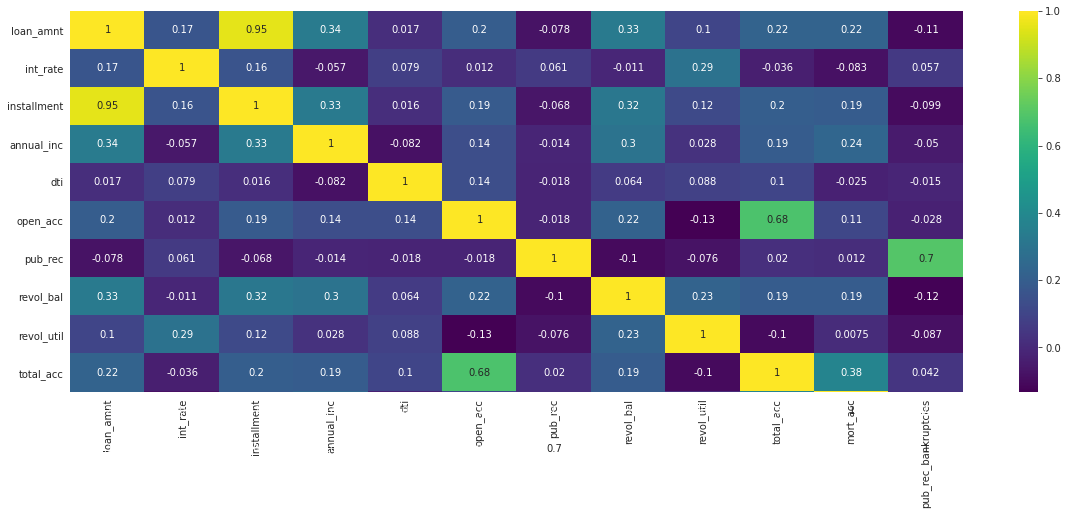

In [13]:
plt.figure(figsize=(20,7))
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.ylim(10, 0)

For The EDA, we will explore rlationships between features that have considerable correlations. 

1. There is a perfect correlation between installment and loan_amount. lets check for the relationship in detail using scatterplot
2. Total_acc to open_acc
3. total_acc to mort_acc
4. pub_rec to pub_rec_bankcruptcies


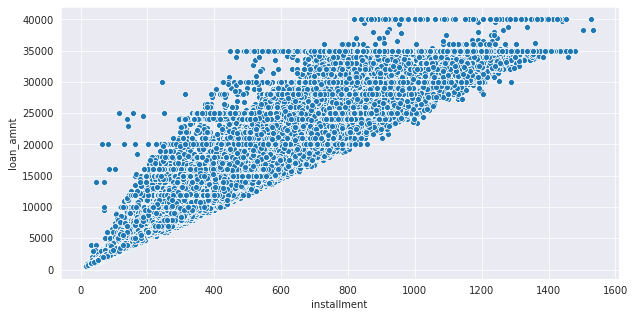

In [14]:
plt.figure(figsize = (10,5))
sns.scatterplot(x = 'installment', y = 'loan_amnt', data = df)

can see a linear relationship above. 

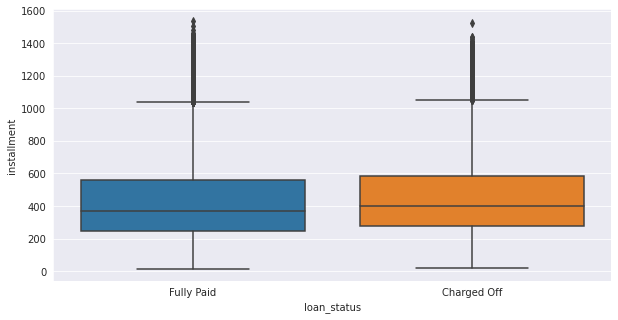

In [15]:
plt.figure(figsize = (10,5))
sns.boxplot(x = 'loan_status', y = 'installment', data = df)

In [16]:
df.groupby('loan_status')['installment'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,452.703110,249.096609,21.62,274.86,399.06,585.67,1527.00
Fully Paid,318357.0,426.761866,250.861622,16.08,244.46,369.51,562.89,1533.81


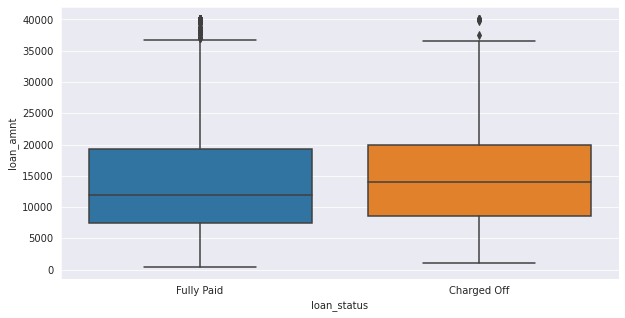

In [17]:
plt.figure(figsize = (10,5))
sns.boxplot(x = 'loan_status', y = 'loan_amnt', data = df)

There is not much relation between the two categories for loan_amount, just the charged off mean loan is slightly higher than the fully paid which is logical

lets check how much the amount is affecting the status

In [18]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


Let's explore the Grade and SubGrade columns that LendingClub attributes to the loans. What are the unique possible grades and subgrades?

In [19]:
grades = sorted(df['grade'].unique())

In [20]:
sub_grade =sorted(df['sub_grade'].unique())

lets check relationship of grades with loan status

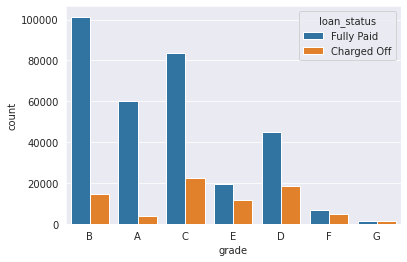

In [21]:
sns.countplot(x = 'grade', hue = 'loan_status', data = df)

Based on grades, we can conclude the charged off ratio increases with grades

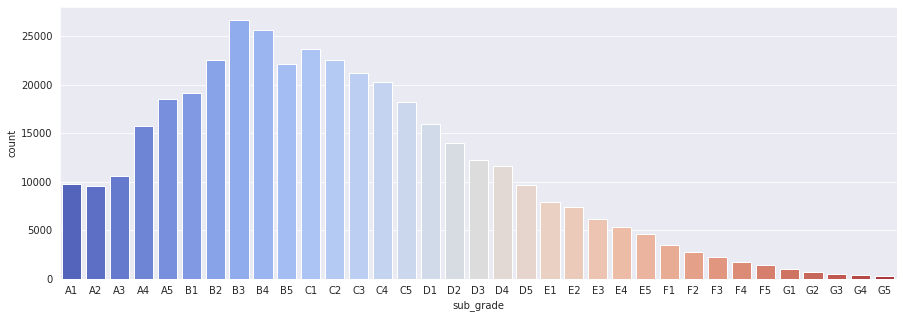

In [22]:
#Checking counts per subgrade
plt.figure(figsize= (15,5))
sub_grade_order = sorted(df['sub_grade'].unique())
sns.countplot(x = 'sub_grade', data = df, order = sub_grade_order, palette='coolwarm')

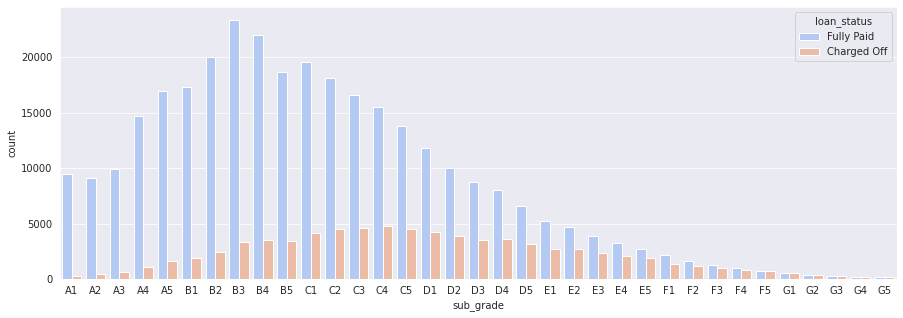

In [23]:
#Checking charged off and fully paid counts per subgrade
plt.figure(figsize= (15,5))
sub_grade_order = sorted(df['sub_grade'].unique())
sns.countplot(x = 'sub_grade', data = df,hue = 'loan_status', order = sub_grade_order, palette='coolwarm')

It looks like F and G subgrades don't get paid back that often. Checking for only those two subgrades

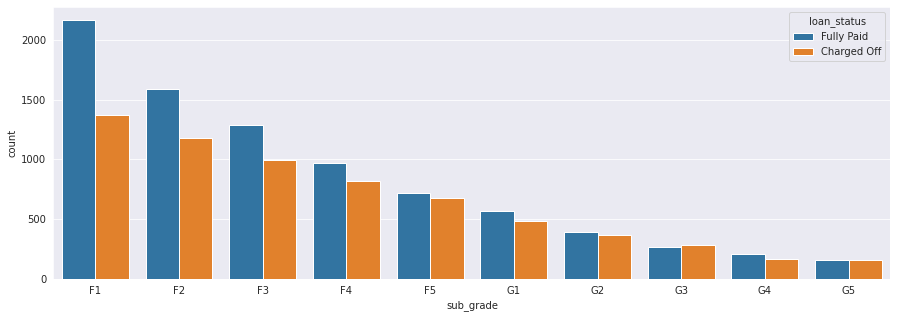

In [24]:
f_and_g = df[(df['grade']=='G') | (df['grade']=='F')]
plt.figure(figsize= (15,5))
subgrade_order = sorted(f_and_g['sub_grade'].unique())
sns.countplot(x = 'sub_grade', data = f_and_g , hue = 'loan_status', order = subgrade_order)


Lets Create a new column called 'load_repaid' which will contain a 1 if the loan status was "Fully Paid" and a 0 if it was "Charged Off".

In [25]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1 , 'Charged Off': 0})

In [26]:
df[['loan_repaid', 'loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


In [27]:
df['loan_repaid1'] = df['loan_status'].apply(lambda x: 0 if x=='Charged Off' else 1)

In [28]:
df = df.drop('loan_repaid1', axis = 1)

Lets create a bar plot showing the correlation of the numeric features to the new loan_repaid column.

In [29]:
loan_corr = df.corr()['loan_repaid'].sort_values().drop('loan_repaid')

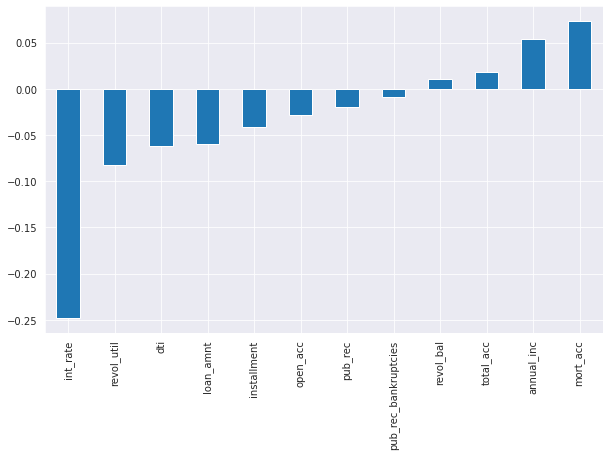

In [30]:
plt.figure(figsize= (10,6))
loan_corr.plot(kind = 'bar')

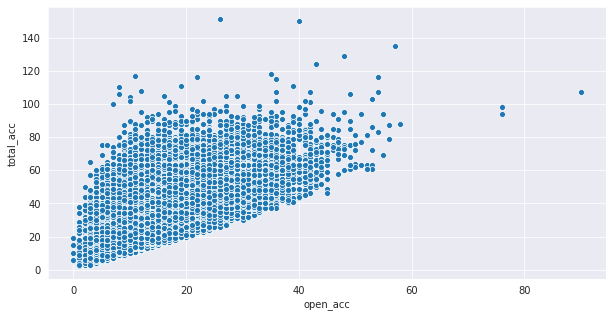

In [31]:
plt.figure(figsize = (10,5))
sns.scatterplot(x = 'open_acc', y = 'total_acc', data = df)

**Data Preprocessing**

First lets check for missing values and treat them

In [32]:
len(df)

396030

In [33]:
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

lets check the % of missing values so that any lower %'s can be just dropped

In [34]:
df.isna().sum()/len(df)*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

lets check emp_title and emp_length

In [35]:
df['emp_title'].value_counts()

Teacher                                     4389
Manager                                     4250
Registered Nurse                            1856
RN                                          1846
Supervisor                                  1830
                                            ... 
Inyo County Water Department                   1
Senior Project Specialist                      1
Bethune Cookman University                     1
Agent Rep                                      1
Director of Civic Center & Arena Complex       1
Name: emp_title, Length: 173105, dtype: int64

too many titles to convert to dummies later for modelleling. The correlation is also low, we can drop the column

In [36]:
df = df.drop('emp_title',axis=1)

In [37]:
df['emp_length'].value_counts()

10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: emp_length, dtype: int64

In [38]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

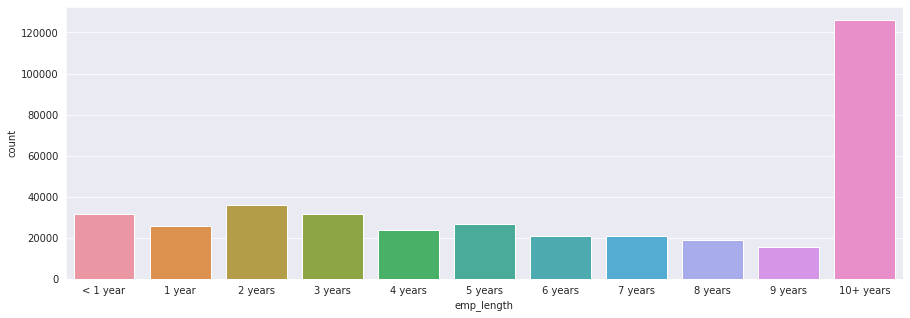

In [39]:
emp_length_order = [ '< 1 year',
                      '1 year',
                     '2 years',
                     '3 years',
                     '4 years',
                     '5 years',
                     '6 years',
                     '7 years',
                     '8 years',
                     '9 years',
                     '10+ years']
plt.figure(figsize = (15,5))
sns.countplot(x = 'emp_length', data = df, order = emp_length_order, )

now lets check the loan status against emp_length

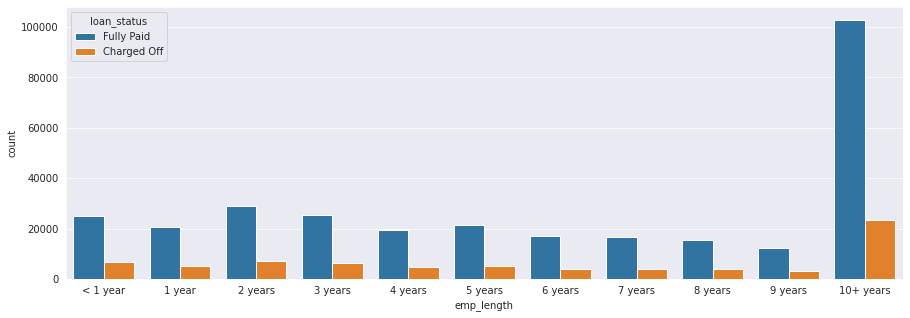

In [40]:
plt.figure(figsize = (15,5))
sns.countplot(x = 'emp_length',hue= 'loan_status', data = df, order = emp_length_order, )

This still doesn't really inform us if there is a strong relationship between employment length and being charged off, what we want is the percentage of charge offs per category. Essentially informing us what percent of people per employment category didn't pay back their loan. 

In [41]:
emp_co = df[df['loan_status'] == 'Charged Off'].groupby('emp_length').count()['loan_status']
emp_fp = df[df['loan_status'] == 'Fully Paid'].groupby('emp_length').count()['loan_status']

In [42]:
emp_len = emp_co/emp_fp

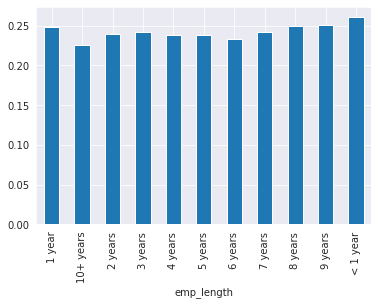

In [43]:
emp_len.plot(kind = 'bar')

Charge off rates are extremely similar across all employment lengths. We can drop this column as well

In [44]:
df = df.drop('emp_length', axis = 1)

In [45]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [46]:
df['title'].value_counts()

Debt consolidation         152472
Credit card refinancing     51487
Home improvement            15264
Other                       12930
Debt Consolidation          11608
                            ...  
straight loan                   1
Good-bye Credit Cards           1
Visa Debt Consolidation         1
paying off credit debt          1
home diy                        1
Name: title, Length: 48817, dtype: int64

In [47]:
df['purpose'].value_counts()

debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
small_business          5701
car                     4697
medical                 4196
moving                  2854
vacation                2452
house                   2201
wedding                 1812
renewable_energy         329
educational              257
Name: purpose, dtype: int64

both columns have same data.  we can drop title column

In [48]:
df = df.drop('title', axis = 1)

In [49]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [50]:
df['total_acc'].isna()

0         False
1         False
2         False
3         False
4         False
          ...  
396025    False
396026    False
396027    False
396028    False
396029    False
Name: total_acc, Length: 396030, dtype: bool

In [51]:
df.drop([28324], axis = 0, inplace = True)

Lets check for mort_acc column

In [52]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49947
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

since this column has large number of missing values, we cannot just drop the column. lets check how to fill these values. lets check for corr with any other column

In [53]:
df.corr()['mort_acc'].sort_values()

int_rate               -0.082584
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011553
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236321
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

a high corr with total_acc. We will group the dataframe by the total_acc and calculate the mean value for the mort_acc per total_acc entry

In [54]:
print("Mean of mort_acc column per total_acc")
df.groupby('total_acc').mean()['mort_acc']

Mean of mort_acc column per total_acc


total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [55]:
df['total_acc'].isna()

0         False
1         False
2         False
3         False
4         False
          ...  
396025    False
396026    False
396027    False
396028    False
396029    False
Name: total_acc, Length: 396029, dtype: bool

In [56]:
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

 Let's fill in the missing mort_acc values based on their total_acc value. If the mort_acc is missing, then we will fill in that missing value with the mean value corresponding to its total_acc value from the Series we created above. 

In [57]:
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']

In [58]:
def fill_mort_acc(total_acc,mort_acc):
    '''
    Accepts the total_acc and mort_acc values for the row.
    Checks if the mort_acc is NaN , if so, it returns the avg mort_acc value
    for the corresponding total_acc value for that row.
    
    total_acc_avg here should be a Series or dictionary containing the mapping of the
    groupby averages of mort_acc per total_acc values.
    '''
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [59]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [60]:
df.isna().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

the remaining null values are very low in % and so we can drop those rows with null values

In [61]:
df = df.dropna()

In [62]:
df.isna().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

We're done working with the missing data! Now we just need to deal with the string values due to the categorical columns.

In [63]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

now we wil go through each of these categorical columns and see if we can get dummies or drop or apply some action on them

In [64]:
df['term'].value_counts()

 36 months    301247
 60 months     93971
Name: term, dtype: int64

Lets Convert the term feature into either a 36 or 60 integer numeric data type. we will not get it into dummies as 36 and 60 numerical gives the model indication of importance

In [65]:
df['term'] = df['term'].apply(lambda term: int(term[:3]))

In [66]:
df['term'].value_counts()

36    301247
60     93971
Name: term, dtype: int64

both grade and subgrades give same info. we will drop grade and get dummies for subgrade

In [67]:
df = df.drop('grade', axis = 1)

In [68]:
subgrade_dummies = pd.get_dummies(df['sub_grade'], drop_first= True)

In [69]:
df = pd.concat([df.drop('sub_grade', axis = 1), subgrade_dummies], axis = 1)

In [70]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [71]:
df.select_dtypes(['object']).columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [72]:
df['verification_status'].value_counts()

Verified           139451
Source Verified    131300
Not Verified       124467
Name: verification_status, dtype: int64

In [73]:
df['application_type'].value_counts()

INDIVIDUAL    394507
JOINT            425
DIRECT_PAY       286
Name: application_type, dtype: int64

In [74]:
df['initial_list_status'].value_counts()

f    237346
w    157872
Name: initial_list_status, dtype: int64

In [75]:
df['purpose'].value_counts()

debt_consolidation    234169
credit_card            82923
home_improvement       23961
other                  21059
major_purchase          8756
small_business          5655
car                     4670
medical                 4175
moving                  2842
vacation                2442
house                   2197
wedding                 1794
renewable_energy         329
educational              246
Name: purpose, dtype: int64

In [76]:
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose' ]],drop_first=True)

In [77]:
df = df.drop(['verification_status', 'application_type','initial_list_status','purpose'], axis = 1)

In [78]:
df = pd.concat([df, dummies], axis = 1)

In [79]:
df.select_dtypes(['object']).columns

Index(['home_ownership', 'issue_d', 'loan_status', 'earliest_cr_line',
       'address'],
      dtype='object')

In [80]:
df['home_ownership'].value_counts()

MORTGAGE    198021
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [81]:
df['home_ownership'] = df['home_ownership'].replace(['ANY', 'NONE'], 'OTHER')
df['home_ownership'].value_counts()

MORTGAGE    198021
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [82]:
dummies = pd.get_dummies(df['home_ownership' ],drop_first=True)

In [83]:
df = pd.concat([df.drop('home_ownership', axis = 1),dummies], axis = 1)

In [84]:
df.select_dtypes(['object']).columns

Index(['issue_d', 'loan_status', 'earliest_cr_line', 'address'], dtype='object')

Let's feature engineer a zip code column from the address in the data set. Create a column called 'zip_code' that extracts the zip code from the address column.

In [85]:
df['zip_code'] = df['address'].apply(lambda address:address[-5:])

In [86]:
df['zip_code'].value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45724
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zip_code, dtype: int64

In [88]:
zip_dummies = pd.get_dummies(df['zip_code' ],drop_first=True)
df = df.drop(['zip_code', 'address'], axis = 1)
df = pd.concat([df,zip_dummies],axis=1)

In [89]:
df.select_dtypes(['object']).columns

Index(['issue_d', 'loan_status', 'earliest_cr_line'], dtype='object')

In [90]:
df['issue_d'].value_counts()

Oct-2014    14838
Jul-2014    12597
Jan-2015    11701
Dec-2013    10609
Nov-2013    10492
            ...  
Jan-2008        3
Dec-2007        2
Aug-2007        1
Oct-2007        1
Nov-2007        1
Name: issue_d, Length: 112, dtype: int64

This would be data leakage, we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date, drop this feature.

In [92]:
df = df.drop('issue_d',axis=1)

In [91]:
df['earliest_cr_line'].value_counts()

Oct-2000    3013
Aug-2000    2930
Oct-2001    2890
Aug-2001    2879
Nov-2000    2729
            ... 
Jan-1953       1
Mar-1960       1
Sep-1956       1
Aug-1951       1
May-1955       1
Name: earliest_cr_line, Length: 684, dtype: int64

This appears to be a historical time stamp feature. Extract the year from this feature using a .apply function, then convert it to a numeric feature. Set this new data to a feature column called 'earliest_cr_year'.Then drop the earliest_cr_line feature.

In [93]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda x:int(x[-4:]))

In [94]:
df = df.drop('earliest_cr_line',axis=1)

In [95]:
df.select_dtypes(['object']).columns

Index(['loan_status'], dtype='object')

In [96]:
df = df.drop('loan_status',axis=1)

**Model Preparation, Train Test Split, Scaling, Normalizing etc.**

In [97]:
df.head()

,loan_amnt,term,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,loan_repaid,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5,verification_status_Source Verified,verification_status_Verified,application_type_INDIVIDUAL,application_type_JOINT,initial_list_status_w,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,OTHER,OWN,RENT,05113,11650,22690,29597,30723,48052,70466,86630,93700,earliest_cr_year
0,10000.0,36,11.44,329.48,117000.0,26.24,16.0,0.0,36369.0,41.8,25.0,0.0,0.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1990
1,8000.0,36,11.99,265.68,65000.0,22.05,17.0,0.0,20131.0,53.3,27.0,3.0,0.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2004
2,15600.0,36,10.49,506.97,43057.0,12.79,13.0,0.0,11987.0,92.2,26.0,0.0,0.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,2007
3,7200.0,36,6.49,220.65,54000.0,2.60,6.0,0.0,5472.0,21.5,13.0,0.0,0.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2006
4,24375.0,60,17.27,609.33,55000.0,33.95,13.0,0.0,24584.0,69.8,43.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1999


In [98]:
from sklearn.model_selection import train_test_split

In [99]:
X = df.drop('loan_repaid',axis=1).values
y = df['loan_repaid'].values

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [101]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Always fit_transform train data and only transfrom test data

In [107]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Activation, Dropout  
from tensorflow.keras.models import Sequential
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.callbacks import EarlyStopping

In [104]:
X_train.shape

(316174, 78)

In [108]:
# Declaring early stop variable
early_stop = EarlyStopping(monitor='val_loss', patience = 5, mode = 'min', verbose= 1)

In [106]:
# Creating sequential model
model = Sequential()

model.add(Dense(78, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(39, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(19, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [109]:
model.fit(x = X_train, y = y_train, batch_size=128, epochs= 50, validation_data= (X_test, y_test), callbacks= [early_stop])

Epoch 1/50
2471/2471 [==============================] - 5s 2ms/step - loss: 0.2957 - val_loss: 0.2659
Epoch 2/50
2471/2471 [==============================] - 5s 2ms/step - loss: 0.2655 - val_loss: 0.2657
Epoch 3/50
2471/2471 [==============================] - 5s 2ms/step - loss: 0.2630 - val_loss: 0.2645
Epoch 4/50
2471/2471 [==============================] - 5s 2ms/step - loss: 0.2621 - val_loss: 0.2646
Epoch 5/50
2471/2471 [==============================] - 5s 2ms/step - loss: 0.2616 - val_loss: 0.2656
Epoch 6/50
2471/2471 [==============================] - 5s 2ms/step - loss: 0.2609 - val_loss: 0.2638
Epoch 7/50
2471/2471 [==============================] - 5s 2ms/step - loss: 0.2605 - val_loss: 0.2635
Epoch 8/50
2471/2471 [==============================] - 5s 2ms/step - loss: 0.2601 - val_loss: 0.2644
Epoch 9/50
2471/2471 [==============================] - 5s 2ms/step - loss: 0.2599 - val_loss: 0.2645
Epoch 10/50
2471/2471 [==============================] - 5s 2ms/step - loss: 0.259

<Figure size 720x360 with 0 Axes>

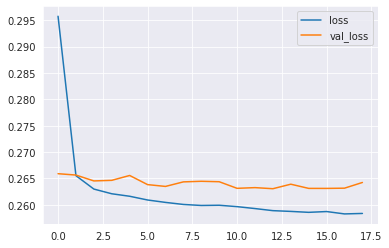

In [111]:
# Plotting loss on validation and test set
loss = pd.DataFrame(model.history.history)
plt.figure(figsize= (10,5))
loss.plot()

Lets create predictions from the X_test set and display a classification report and confusion matrix for the X_test set.

In [112]:
from sklearn.metrics import classification_report, confusion_matrix


In [116]:
# always use model.predict_classes to generate class predictions using keras
predictions = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [117]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.42      0.59     15777
           1       0.87      1.00      0.93     63267

    accuracy                           0.88     79044
   macro avg       0.94      0.71      0.76     79044
weighted avg       0.90      0.88      0.87     79044



The low recall and f1 score on class 0 is due to class imbalance. We can later use random oversampler to balance classes and check the performance again

In [118]:
confusion_matrix(y_test, predictions)

array([[ 6681,  9096],
       [    6, 63261]])